# Derivatives ... starting with regression

Links:
- https://datahacker.rs/003-pytorch-how-to-implement-linear-regression-in-pytorch/

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
%matplotlib inline
%config InlineBackend.figure_format='retina'

First let's create the observed data

In [3]:
x = np.arange(1,10, dtype=np.float64)
y = 2 * x + 0.0

Now consider a *linear* model with a single paramater:
$$
y = a x
$$

If we try a model with say $a_1$, then we have $\hat{y}_1 = a_1 x$ so that
$$
\hat{y}_1 - y = a_1 x_{true} - 2 x_{true}
$$
is the error.

Next, we want to try a bunch of $a_i$ and minimize
$$
loss = (\hat{y} - y)^2
$$
or through cost as
$$
cost = \frac{1}{N}\sum_{n=1}^{N}(\hat{y}_n - y_n)^2
$$
where $N$ is the number of observed points (`len(y)`)
(of course, for this model we could use least-squares to find the minimum)

Let's try this...

In [4]:
alist = np.linspace(0,4,50)
cost = np.zeros(len(alist))

for i, a in enumerate(alist):
    loss = a*x - y
    cost[i] = (1/len(y)) * np.sum(loss)**2

Text(0, 0.5, 'cost')

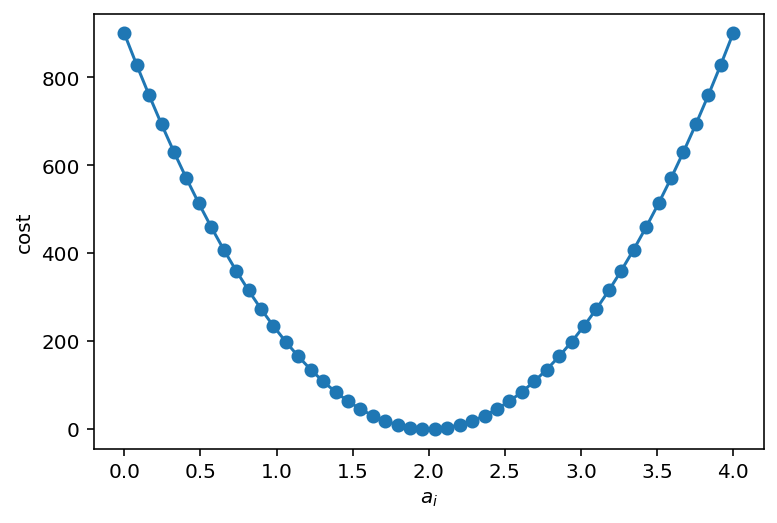

In [5]:
fig, ax = plt.subplots()
ax.plot(alist, cost, 'o-')
ax.set_xlabel('$a_i$')
ax.set_ylabel('cost')

A little match helps a lot...

Let $J$ be the cost:
$$
J = \sum_n (a x_n - y_n)^2
$$

Then minimizing the loss over $a$ we need the derivative:
$$
\begin{align}
\frac{\partial J}{\partial a}
&= \frac{1}{N} \sum_n \frac{\partial}{\partial a} (a x_n - y_n)\\
&= \frac{1}{N}\sum_n 2(ax_n-y_n)\frac{\partial}{\partial a}(a x_n - y_n)\\
&= \frac{1}{N}\sum_n 2(ax_n-y_n)(x_n - 0)\\
&= \frac{1}{N}\sum_n 2x_n (ax_n-y_n)
\end{align}
$$

Now, we check an $a_i$, and compute the gradient to see if we need to increase or decrease $a_i$ to create the model.  How much?  This is the learning rate:
$$
a_{i+1} = a_i - \alpha \frac{\partial J}{\partial a}
$$

In [6]:
xt = torch.from_numpy(x).reshape(-1,1)
yt = torch.from_numpy(y).reshape(-1,1)

In [7]:
model = torch.nn.Linear(1, 1, bias=False, dtype=torch.float64)
loss = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

Train the model... 1000 times.

In [8]:
cost_history = []

for epock in range(1000):
    yhat = model(xt)
    
    output = loss(yhat, yt)
    output.backward()  # computes dloss/da
    cost_history.append(output.item())
    
    optimizer.step()   # a <- a - 0.01 dloss/da
    optimizer.zero_grad()

This all looks complex for a simple model!

Let's try finding $a$.

In [9]:
y_predicted = model.forward(xt)

weight Parameter containing:
tensor([[2.]], dtype=torch.float64, requires_grad=True)


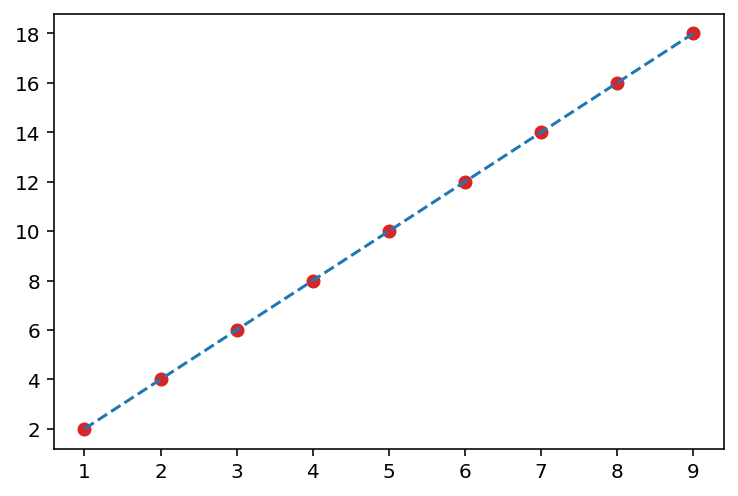

In [10]:
plt.plot(xt, yt, 'o', color='tab:red')
plt.plot(xt, y_predicted.detach().numpy(), '--')

for name, param in model.named_parameters():
  print(name, param)